# Hurtos en Medellín

## Librerías

In [1]:
import locale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from typing import List

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

%matplotlib inline
plt.style.use('ggplot')

In [2]:
locale.setlocale(locale.LC_TIME, 'es_ES')

'es_ES'

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Metadata

In [4]:
class Categories:
    """Clase que contiene la asignación de las categorias."""
    
    categoria_transporte = {
        'Caminata': 'Caminata',
        'Taxi': 'Transporte público',
        'Motocicleta': 'Motocicleta',
        'Automóvil': 'Vehículo',
        'Metro': 'Transporte público',
        'Bicicleta': 'Bicicleta',
        'Autobus': 'Transporte público',
        'Motocicleta con parrillero': 'Motocicleta',
        'Sin dato': 'Otro',
        'Planeador': 'Otro'}
    
    categoria_modalidad = {
        'Atraco': 'Atraco',
        'Descuido': 'Hurto',
        'Cosquilleo': 'Hurto',
        'Raponazo': 'Hurto',
        'Sin dato': 'Otros',
        'Rompimiento cerraduta': 'Robo',
        'Engaño': 'Engaño',
        'Escopolamina': 'Manipulación',
        'Rompimiento de ventana': 'Hurto',
        'Halado': 'Hurto',
        'Clonación de tarjeta': 'Engaño',
        'Comisión de delito': 'Engaño',
        'Suplantación': 'Engaño',
        'Paquete chileno': 'Otros',
        'Abuso de confianza': 'Otros',
        'Informático': 'Otros',
        'Llave maestra': 'Hurto',
        'Fleteo': 'Robo',
        'Miedo o terror': 'Otros',
        'Simulando necesidad': 'Engaño',
        'Retención de tarjeta': 'Manipulación',
        'Llamada millonaria': 'Engaño',
        'Forcejeo': 'Hurto',
        'Retención de dinero': 'Otros',
        'Tóxico o agente químico': 'Otros',
        'Enfrentamiento con la fuerza pública': 'Otros',
        'Auto robo': 'Hurto',
        'Violencia intrafamiliar': 'Otros',
        'Vandalismo': 'Otros'}
    
    categoria_armas = {
        'Arma cortopunzante': 'Arma',
        'No': 'Sin arma',
        'Arma de fuego': 'Arma',
        'Objeto contundente': 'Arma',
        'Escopolamina': 'Arma',
        'Sin dato': 'Sin arma',
        'Llave maestra': 'Sin arma',
        'Perro': 'Sin arma',
        'Palanca': 'Sin arma',
        'Tóxico o Químico': 'Arma'}
    
    categoria_lugar = {
        'Vía pública': 'Pública',
        'Hospital o centro de salud': 'Pública',
        'Fábrica o empresa': 'Privada',
        'Institución de educación superior': 'Pública',
        'Vehículo particular': 'Privada',
        'Hotel, motel y hostal': 'Privada',
        'Parqueadero': 'Privada',
        'Terminal de transporte': 'Pública',
        'Restaurante': 'Privada',
        'Parque': 'Pública',
        'Estación del Metro': 'Pública',
        'Centro comercial': 'Privada',
        'Oficina': 'Privada',
        'Residencia': 'Privada',
        'Escenario deportivo': 'Pública',
        'Almacén tienda y otro': 'Privada',
        'Banco': 'Privada',
        'Bus de servicio público': 'Pública',
        'Local comercial': 'Privada',
        'Institución educativa (jardín, primaria o secundaria)': 'Pública',
        'Estación de gasolina': 'Pública',
        'Estación del Metro plus': 'Pública',
        'Supermercado': 'Privada',
        'Casa de apuesta': 'Privada',
        'Piscina': 'Pública',
        'Paradero de bus': 'Pública',
        'Bar o cantina': 'Privada',
        'Casa o apartamento': 'Privada',
        'Metro Plus': 'Pública',
        'Aeropuerto': 'Pública',
        'Plaza de mercado': 'Pública',
        'Cafetería': 'Privada',
        'Conjunto residencial': 'Privada',
        'Sin dato': 'Sin dato',
        'Bodega': 'Privada',
        'Edificio': 'Privada',
        'Cajero electrónico': 'Privada',
        'Iglesia': 'Pública',
        'Taller mecánico': 'Privada',
        'Matadero, carnicería y similar': 'Privada',
        'Droguería o farmacia': 'Privada',
        'Cementerio': 'Pública',
        'Sede social, club, auditorio o similar': 'Pública',
        'Teatro': 'Pública',
        'Instalación gubernamental': 'Pública',
        'Biblioteca': 'Pública',
        'Puente peatonal': 'Pública',
        'Finca': 'Privada',
        'Instalación fuerza pública': 'Pública',
        'Centro de belleza o estética': 'Privada',
        'Casino': 'Privada',
        'Instalación judicial': 'Pública',
        'Panadería': 'Privada',
        'Plaza de toros': 'Pública',
        'Obra en construcción': 'Pública',
        'Quebrada o rio': 'Pública',
        'Lavadero de carros': 'Privada',
        'Gimnasio': 'Privada',
        'Café internet': 'Privada',
        'Baño': 'Privada',
        'Feria de ganado': 'Pública',
        'Turístico': 'Pública',
        'Caseta de vigilancia empresa': 'Privada',
        'Laboratorios de procesamiento de droga ílicita': 'Privada',
        'Montallanta': 'Privada',
        'Corporación': 'Privada',
        'Caseta vigilancia conjunto residencial': 'Privada',
        'Cárcel': 'Pública',
        'Hogar de paso': 'Pública',
        'Funeraria y sala de velación': 'Privada',
        'Billar': 'Privada',
        'Reserva natural': 'Pública',
        'Albergue': 'Pública',
        'Zona boscosa': 'Pública',
        'Lote baldío': 'Pública',
        'Potrero': 'Pública',
        'Compraventa': 'Privada',
        'Estadero': 'Privada',
        'Hipodromo': 'Pública',
        'Represa o laguna': 'Pública',
        'Empresa de transporte': 'Privada',
        'Joyería': 'Privada',
        'Cantera': 'Pública',
        'Puesto de trabajo': 'Privada',
        'Prostíbulo': 'Privada',
        'Librería': 'Privada',
        'Metro': 'Pública',
        'Consultorio jurídico': 'Privada',
        'Peaje': 'Pública',
        'Sede política': 'Pública',
        'Desguazadero': 'Privada'}

## Utils

In [5]:
def find_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Encuentra los valores faltantes en un DataFrame y devuelve un nuevo DataFrame
     que muestra la cantidad de valores faltantes y el porcentaje correspondiente.

    Args:
        df: El DataFrame que se va a analizar.

    Returns:
        Un nuevo DataFrame que muestra las columnas, la cantidad de
        valores faltantes y el porcentaje de valores faltantes para cada columna.

    """
    lista = []
    for col in df.columns:
        num = df[df[col].isnull()].shape[0]
        lista.append(num)
    
    dic = {
        'Columnas': df.columns,
        'Faltantes': lista}
    df_faltantes = pd.DataFrame(dic)
    
    df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / df.shape[0]
    
    df_faltantes = df_faltantes.sort_values(by='Faltantes', ascending=False)
    
    return df_faltantes

In [6]:
def importance_columns(df: pd.DataFrame, 
                       element: str = 'Sin dato') -> pd.DataFrame:
    """Calcula la importancia de las columnas en función de la 
     proporción de un elemento dado en cada una de ellas.

    Args:
        df: El DataFrame del cual se calculará la importancia de 
         las columnas.
        element: El elemento a evaluar en cada columna. 
         Por defecto es 'Sin dato'.

    Returns:
        Un DataFrame con las columnas y su respectivo porcentaje 
         de ocurrencia del elemento proporcionado, ordenado de 
         forma descendente según el porcentaje.

    """
    
    ls = []
    for col in df.columns:
        df_filt = df[df[col] == element]
        porcentaje_faltantes = df_filt.shape[0] / hurtos.shape[0] * 100
        ls.append(porcentaje_faltantes)
        
    importance = pd.DataFrame({'columna': df.columns, 'porcentaje': ls})
    
    importance = importance.sort_values(by='porcentaje', ascending=False)
    
    return importance

In [7]:
def pie_missing(df: pd.DataFrame, shape: int) -> None:
    """Genera un gráfico de tipo pie para visualizar el 
     porcentaje de datos faltantes en un DataFrame.

    Args:
        df: El DataFrame del cual se calculará el porcentaje 
         de datos faltantes.
        shape: El número total de registros en el DataFrame.

    Returns:
        None: La función muestra el gráfico de tipo pie 
         de forma interactiva en la salida.

    """
    total_faltantes = df['Faltantes'].sum()
    plt.figure(figsize=(5, 5))
    datos = [shape - total_faltantes, total_faltantes]
    label = ['No nulos', 'Nulos']

    plt.pie(
        datos, 
        labels=label, 
        colors=['orchid', 'lightblue'], 
        autopct='%.2f%%')
    plt.title('Porcentaje de datos faltantes')
    plt.show()

In [8]:
def bar_subplots(df: pd.DataFrame, 
                 columnas: List[str],
                 savefig: bool = False) -> None:
    """
    Genera diagramas de barras para contar la cantidad 
     de hurtos en cada columna especificada.

    Args:
        df: DataFrame que contiene los datos de los hurtos.
        columnas: Lista de columnas del DataFrame a 
         mostrar en los diagramas de barras.
        savefig: Opcional. Si se quiere guardar la imagen 
         en output.

    """
    num_columnas = len(columnas)
    num_filas = num_columnas // 2 + num_columnas % 2 

    fig, axs = plt.subplots(num_filas, 2, figsize=(12, 4 * num_filas))
    fig.tight_layout(pad=4.0)

    for i, columna in enumerate(columnas):
        ax = axs[i // 2, i % 2] if num_filas > 1 else axs[i]
        valores = df[columna].value_counts()

        ax.bar(valores.index, valores.values)
        ax.set_title(f"Hurtos por {columna}")
        plt.xlabel(None)
        ax.yaxis.set_visible(False)
        
        ax.set_xticks(range(len(valores.index))) 
        ax.set_xticklabels(valores.index, rotation=20) 

        for p in ax.patches:
            ax.annotate(
                '{:,.0f}'.format(int(p.get_height())).replace(",", "."),
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

        for spine in ax.spines:
            ax.spines[spine].set_visible(False)
    
    if savefig:
        plt.savefig(Path('..') / 'output' / 'fig.png', bbox_inches='tight')
    plt.show()

## Lectura de datos

In [9]:
path = Path('..') / 'data' / 'hurto_a_persona.csv'

In [10]:
hurtos = pd.read_csv(path, encoding='utf-8', sep=';', dtype=str)

In [11]:
print(f'El tamaño del dataset: \n {hurtos.shape[0]} filas y {hurtos.shape[1]} columnas')

El tamaño del dataset: 
 305879 filas y 36 columnas


## Analisis exploratorio

### Conversión de tipos de datos

In [12]:
types = {
    'fecha_hecho': 'datetime64[ns]',
    'cantidad': float,
    'latitud': float,
    'longitud': float,
    'edad': int,
    'fecha_ingestion': 'datetime64[ns]'
}

hurtos = hurtos.astype(types)

### Imputación de datos

In [13]:
eleccion_cols = importance_columns(hurtos)

In [14]:
eleccion_cols

,columna,porcentaje
18,caracterizacion,100.000000
15,testigo,100.000000
34,unidad_medida,100.000000
33,permiso,100.000000
22,categoria_penal,100.000000
21,articulo_penal,100.000000
7,grupo_actor,100.000000
8,actividad_delictiva,100.000000
9,parentesco,100.000000
10,ocupacion,100.000000


In [15]:
cols_drop = eleccion_cols[eleccion_cols['porcentaje'] > 50]['columna'].values

In [16]:
hurtos.drop(cols_drop, axis=1, inplace=True)

In [17]:
missing_values = find_missing(hurtos)

In [18]:
missing_values

,Columnas,Faltantes,Porcentaje
2,latitud,14231,0.046525
3,longitud,14231,0.046525
0,fecha_hecho,0,0.000000
12,codigo_barrio,0,0.000000
19,modelo,0,0.000000
18,grupo_bien,0,0.000000
17,categoria_bien,0,0.000000
16,bien,0,0.000000
15,sede_receptora,0,0.000000
14,lugar,0,0.000000


In [19]:
shape = hurtos.shape[0] * hurtos.shape[1]

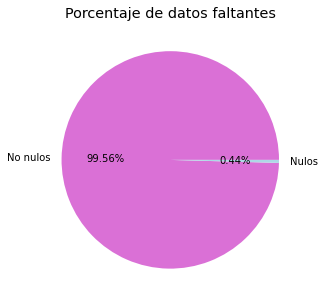

In [20]:
pie_missing(missing_values, shape)

#### Llenar posición geográfica segun datos existentes

In [21]:
barrios = hurtos[hurtos['latitud'].isnull()]['nombre_barrio'].values

In [22]:
cond_barrios = hurtos['nombre_barrio'].isin(barrios)
cond_pos = hurtos['latitud'].notnull()

locacion = hurtos.loc[cond_barrios & cond_pos, ['nombre_barrio', 'latitud', 'longitud']]
locacion = locacion.groupby('nombre_barrio', as_index=False).mean()

In [23]:
locacion

,nombre_barrio,latitud,longitud
0,Aguas Frias,6.232493,-75.647458
1,Aldea Pablo VI,6.287915,-75.542049
2,Alejandro Echavarría,6.238090,-75.546697
3,Alejandría,6.200316,-75.569970
4,Alfonso López,6.283903,-75.574895
...,...,...,...
265,Villa Nueva,6.252273,-75.562773
266,Villa del Socorro,6.294771,-75.552934
267,Villatina,6.236930,-75.539896
268,Área Urbana Cgto. San Antonio de Prado,6.180854,-75.648451


In [24]:
hurtos = pd.merge(hurtos, locacion, on='nombre_barrio', how='left', suffixes=('', '_fill'))

In [25]:
hurtos['latitud'] = hurtos['latitud'].fillna(hurtos['latitud_fill'])
hurtos['longitud'] = hurtos['longitud'].fillna(hurtos['longitud_fill'])

In [26]:
hurtos.drop(columns=['latitud_fill', 'longitud_fill'], inplace=True)

In [27]:
hurtos = hurtos.loc[hurtos['latitud'].notnull(), hurtos.columns]

#### Validación de nulos

In [28]:
find_missing(hurtos)

,Columnas,Faltantes,Porcentaje
0,fecha_hecho,0,0.0
11,nombre_barrio,0,0.0
19,modelo,0,0.0
18,grupo_bien,0,0.0
17,categoria_bien,0,0.0
16,bien,0,0.0
15,sede_receptora,0,0.0
14,lugar,0,0.0
13,codigo_comuna,0,0.0
12,codigo_barrio,0,0.0


## Transformaciones

In [29]:
hurtos['hora'] = hurtos['fecha_hecho'].dt.time

In [30]:
hurtos['hora'] = hurtos['hora'].apply(lambda x: x.strftime("%H:%M"))

In [31]:
hurtos['fecha'] = hurtos['fecha_hecho'].dt.date

In [32]:
hurtos['dia_semana'] = hurtos['fecha_hecho'].dt.strftime('%A')

* Para realizar la asiganción de las categorias se usa la clase Categories definida en metadata

In [33]:
hurtos['medio_transporte'] = hurtos['medio_transporte'].map(Categories.categoria_transporte)

In [34]:
hurtos['modalidad'] = hurtos['modalidad'].map(Categories.categoria_modalidad)

In [35]:
hurtos['arma_medio'] = hurtos['arma_medio'].map(Categories.categoria_armas)

In [36]:
hurtos['lugar'] = hurtos['lugar'].map(Categories.categoria_lugar)

In [37]:
criterios = [
    hurtos['edad'] < 30,
    hurtos['edad'].between(30, 60, inclusive='left'),
    hurtos['edad'] >= 60
]
categorias = ['Joven', 'Adulto', 'Mayor']

hurtos['edad'] = np.select(criterios, categorias)

* Se grafican los resultados

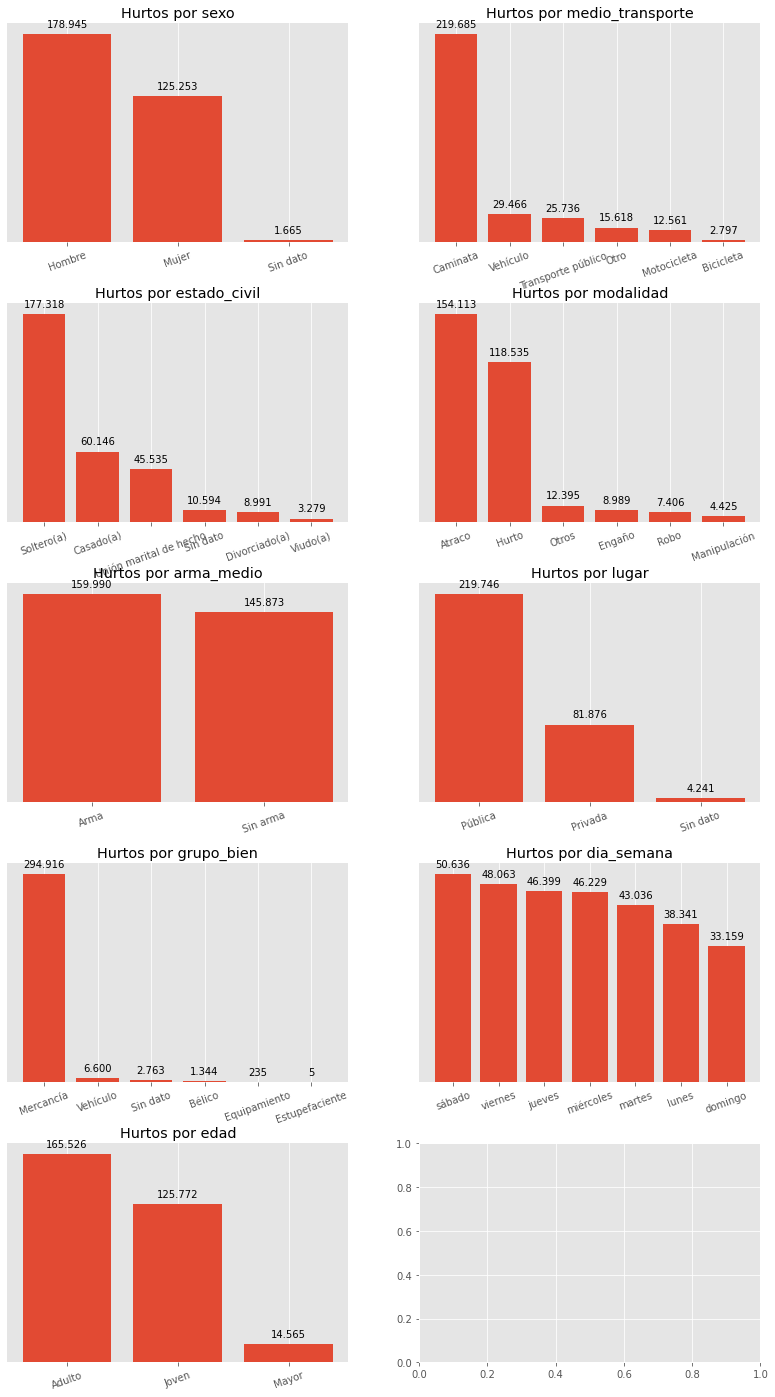

In [38]:
cols = ['sexo', 'medio_transporte', 'estado_civil', 
        'modalidad', 'arma_medio', 'lugar', 'grupo_bien',
        'dia_semana', 'edad']

bar_subplots(hurtos, cols, savefig=True)

In [39]:
columnas = ['fecha_hecho', 'latitud', 'longitud', 'sexo', 'edad',
            'estado_civil', 'medio_transporte', 'conducta', 'modalidad',
            'arma_medio', 'nombre_barrio', 'lugar', 'grupo_bien',
            'hora', 'fecha', 'dia_semana']
hurtos = hurtos.loc[:, columnas]

In [40]:
hurtos.to_parquet(Path('..') / 'output' / 'hurtos.parquet', index=False)

## Modelo

In [41]:
hurtos.head(2)

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,arma_medio,nombre_barrio,lugar,grupo_bien,hora,fecha,dia_semana
0,2017-01-01 06:00:00,6.299703,-75.582016,Mujer,Adulto,Unión marital de hecho,Caminata,Hurto a persona,Atraco,Arma,Doce de Octubre No.2,Pública,Mercancía,06:00,2017-01-01,domingo
1,2017-01-01 20:00:00,6.250917,-75.566160,Mujer,Joven,Soltero(a),Caminata,Hurto a persona,Atraco,Arma,La Candelaria,Pública,Mercancía,20:00,2017-01-01,domingo


In [42]:
hurtos['fecha'].min()

datetime.date(2003, 1, 1)

In [43]:
hurtos['fecha'].max()

datetime.date(2023, 3, 1)

In [44]:
hurtos['fecha'] = pd.to_datetime(hurtos['fecha'])
hurtos = hurtos.set_index('fecha')
hurtos_model = hurtos.resample('M').size()

In [45]:
hurtos_model

fecha
2003-01-31     214
2003-02-28     178
2003-03-31     258
2003-04-30     354
2003-05-31     510
              ... 
2022-11-30    3531
2022-12-31    3319
2023-01-31    3382
2023-02-28    3703
2023-03-31      11
Freq: M, Length: 243, dtype: int64

In [47]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hurtos_model.values.reshape(-1, 1))

In [48]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [49]:
window_size = 12
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 5s 24ms/step - loss: 0.0491
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0279
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0131
Epoch 4/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0098
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0089
Epoch 6/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0056
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0049
Epoch 8/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0033
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0030
Epoch 10/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0032
Epoch 11/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0029
Epoch 12/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0028
Epoch 13/50
6/6 [==============================] - 0s 27ms/st

In [53]:
X_test, y_test = [], []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [54]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [55]:
loss = model.evaluate(X_test, y_test)
print("Pérdida en datos de prueba:", loss)

2/2 [==============================] - 1s 16ms/step - loss: 0.0435
Pérdida en datos de prueba: 0.04345664381980896


In [57]:
predictions = model.predict(X_test)

2/2 [==============================] - 1s 11ms/step


In [58]:
predictions = scaler.inverse_transform(predictions)

In [66]:
x_input = X_test[-6:]

predictions = model.predict(x_input)
predictions = scaler.inverse_transform(predictions)

print("Predicciones para los próximos 6 meses:")
for prediction in predictions:
    print(prediction)

1/1 [==============================] - 0s 103ms/step
Predicciones para los próximos 6 meses:
[3435.418]
[3449.8694]
[3476.359]
[3484.292]
[3511.4758]
[3555.2642]


In [ ]:
scaler.inverse_transform(predictions)